In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import json
import random


# Distribution of the number of answers

In [2]:
def get_SQuAD1():
    train_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v1.1.json"
    train_path = keras.utils.get_file("train-v1.1.json", train_data_url)
    with open(train_path) as json_file:
        raw_train_data = json.load(json_file)

    topics = raw_train_data['data']
    random.Random(1).shuffle(topics)

    i = int(len(raw_train_data['data']) * 0.95)
    raw_train_data = {'data': topics[:i]}
    raw_val_data = {'data': topics[i:]}

    test_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v1.1.json"
    test_path = keras.utils.get_file("dev-v1.1.json", test_data_url)
    with open(test_path) as json_file:
        raw_test_data = json.load(json_file)
    return raw_train_data, raw_val_data, raw_test_data


def get_SQuAD2():
    train_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/train-v2.0.json"
    train_path = keras.utils.get_file("train-v2.0.json", train_data_url)
    with open(train_path) as json_file:
        raw_train_data = json.load(json_file)

    topics = raw_train_data['data']
    random.Random(1).shuffle(topics)

    i = int(len(raw_train_data['data']) * 0.95)
    raw_train_data = {'data': topics[:i]}
    raw_val_data = {'data': topics[i:]}

    test_data_url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/dev-v2.0.json"
    test_path = keras.utils.get_file("dev-v2.0.json", test_data_url)
    with open(test_path) as json_file:
        raw_test_data = json.load(json_file)
    return raw_train_data, raw_val_data, raw_test_data


def get_NewsQA():
    train_data_url = "http://206.12.93.90:8080/newsqa-data/newsqa-data-train-v3.json"
    train_path = keras.utils.get_file("newsqa-data-train-v3.json", train_data_url)
    with open(train_path) as json_file:
        raw_train_data = json.load(json_file)

    val_data_url = "http://206.12.93.90:8080/newsqa-data/newsqa-data-dev-v3.json"
    val_path = keras.utils.get_file("newsqa-data-val-v3.json", val_data_url)
    with open(val_path) as json_file:
        raw_val_data = json.load(json_file)

    test_data_url = "http://206.12.93.90:8080/newsqa-data/newsqa-data-test-v3.json"
    test_path = keras.utils.get_file("newsqa-data-test-v3.json", test_data_url)
    with open(test_path) as json_file:
        raw_test_data = json.load(json_file)
    return raw_train_data, raw_val_data, raw_test_data




In [3]:
def get_ans_dist(raw_data):
    all_answers_dist = []
    for item in raw_data["data"]:
        for para in item["paragraphs"]:
            context = para["context"]
            for qa in para["qas"]:
                all_answers_dist.append(len(qa["answers"]))
    return all_answers_dist




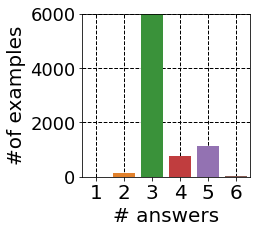

In [14]:
raw_train_data, raw_val_data, raw_test_data = get_SQuAD1()

all_answers_dist = get_ans_dist(raw_test_data)
df_all_answers_dist = pd.DataFrame(columns=['x','y'])
list_all_answers_dist = list(zip(all_answers_dist, all_answers_dist))
df_all_answers_dist = df_all_answers_dist.append(pd.DataFrame(list_all_answers_dist, columns=['x','y']),ignore_index=True)




# from numpy import count
plt.figure(figsize=(3,3))

tips = sns.load_dataset("tips")
ax = sns.barplot(x="x", y="y", data=df_all_answers_dist, estimator=len, ci=None, palette="tab10")

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("# answers")
plt.ylabel("#of examples")
# plt.ylabel("")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0, 6000)
# plt.xlim(-1, 8)
plt.savefig('plots/dist_answers_in_examples_SQuAD1.1.eps', bbox_inches = 'tight')
plt.show()



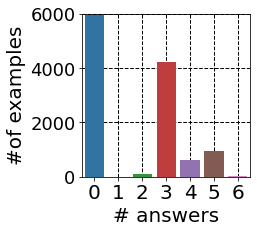

In [15]:
raw_train_data, raw_val_data, raw_test_data = get_SQuAD2()

all_answers_dist = get_ans_dist(raw_test_data)
df_all_answers_dist = pd.DataFrame(columns=['x','y'])
list_all_answers_dist = list(zip(all_answers_dist, all_answers_dist))
df_all_answers_dist = df_all_answers_dist.append(pd.DataFrame(list_all_answers_dist, columns=['x','y']),ignore_index=True)




# from numpy import count
plt.figure(figsize=(3,3))

tips = sns.load_dataset("tips")
ax = sns.barplot(x="x", y="y", data=df_all_answers_dist, estimator=len, ci=None, palette="tab10")

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("# answers")
plt.ylabel("#of examples")
# plt.ylabel("")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0, 6000)
# plt.xlim(-1, 8)
plt.savefig('plots/dist_answers_in_examples_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()



<Figure size 432x288 with 0 Axes>

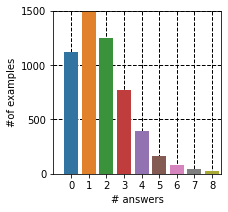

In [4]:
raw_train_data, raw_val_data, raw_test_data = get_NewsQA()
all_answers_dist = get_ans_dist(raw_test_data)
df_all_answers_dist = pd.DataFrame(columns=['x','y'])
list_all_answers_dist = list(zip(all_answers_dist, all_answers_dist))
df_all_answers_dist = df_all_answers_dist.append(pd.DataFrame(list_all_answers_dist, columns=['x','y']),ignore_index=True)


# from numpy import count
plt.set_cmap('jet')
plt.figure(figsize=(3,3))

tips = sns.load_dataset("tips")
ax = sns.barplot(x="x", y="y", data=df_all_answers_dist, estimator=len, ci=None, palette="tab10")

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("# answers")
plt.ylabel("#of examples")
# plt.ylabel("")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24 }
plt.rcParams.update(params)

plt.ylim(0, 1500)
plt.xlim(-1, 8.5)
plt.savefig('plots/dist_answers_in_examples_NewsQA.eps', bbox_inches = 'tight')
plt.show()



# Performance 

In [16]:
IMPURITY_ARRAY = ['0.50', '0.60', '0.70', '0.80', '0.90','0.95', '1.00']  # lambda parameter
ARRAY_SIZE_LIST = [10, 20, 30, 50, 100, 150, 200, 300, 400, 500]
P_LIST = [1,2,3,4,5]

performance_frames = []
time_frames = []
for p in P_LIST:
    for impurity in IMPURITY_ARRAY:
        performance_df = pd.read_csv('output/perf_raw_p='+str(p)+'_impurity='+str(impurity)+'.tsv', delimiter='\t')
        performance_df['pos'] = p
        performance_df['impurity'] = float(impurity)
        performance_frames.append(performance_df)
        
        time_df = pd.read_csv('output/time_raw_p='+str(p)+'_impurity='+str(impurity)+'.tsv', delimiter='\t')
        time_df['pos'] = p
        time_df['impurity'] = float(impurity)
        time_frames.append(time_df)
        
performance_df = pd.concat(performance_frames)
time_df = pd.concat(time_frames)

 

# Performance F1-Score

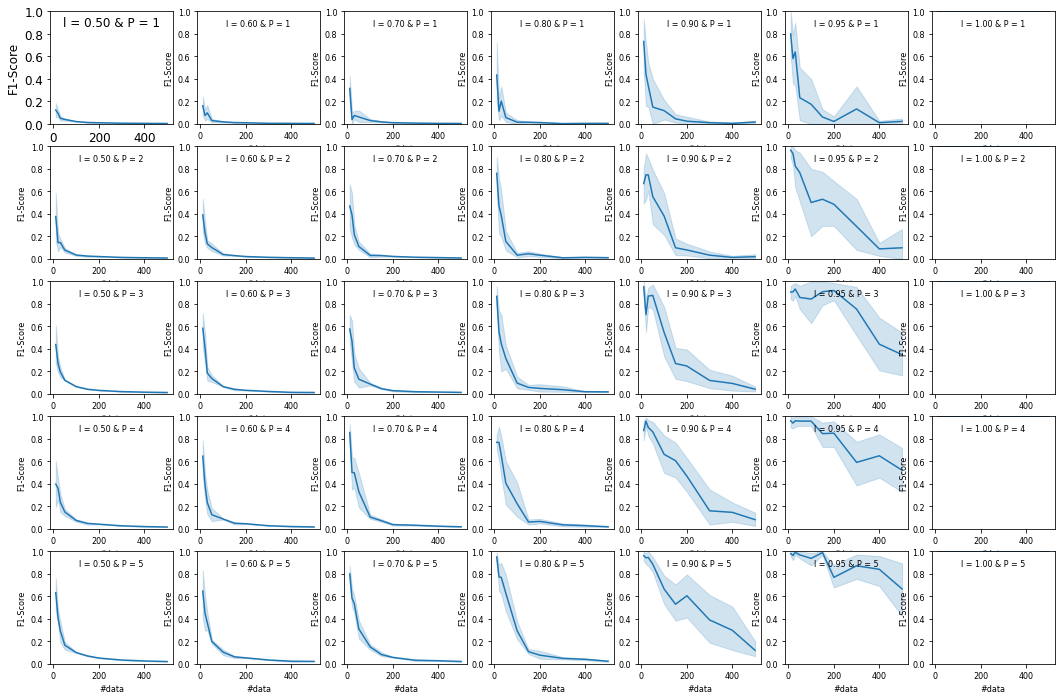

In [21]:
plt.figure(figsize=(18, 12))
i = 0
for p in P_LIST:
    for impurity in IMPURITY_ARRAY:        
        ax = plt.subplot(5, 7, i + 1)   
        results = performance_df[(performance_df['pos'] == p) & (performance_df['impurity'] == float(impurity))]
        sns.lineplot(
        data=results, 
            x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95
        )
        
        ax.text(.5,.87, "l = "+impurity+f" & P = {p:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("#data")
        plt.ylabel("F1-Score")
        plt.ylim(0, 1)
        params = {'legend.fontsize': 8,
          'axes.labelsize': 8,
          'axes.titlesize': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.titlepad': 8,
          'font.size': 8}
        plt.rcParams.update(params)
        i += 1   


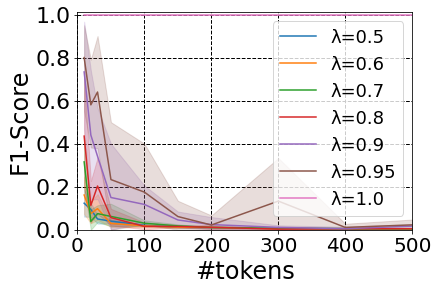

In [10]:

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.5)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.5"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.6)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.6"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.7)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.7"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.8)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.8"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.9)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.9"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 0.95)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.95"
)

results = performance_df[(performance_df['pos'] == 1) & (performance_df['impurity'] == 1)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=1.0"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("#tokens")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(0, 500)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([0,100,200,300,400,500])

params = {'legend.fontsize': 18,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_data_p1.pdf', bbox_inches = 'tight')
plt.show()
        
        

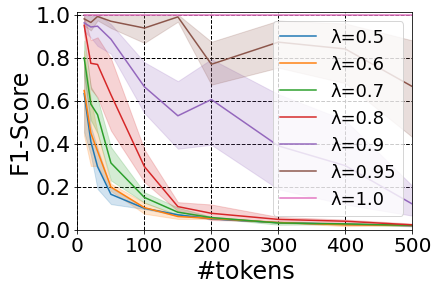

In [11]:

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.5)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.5"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.6)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.6"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.7)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.7"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.8)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.8"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.9)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.9"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 0.95)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=0.95"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['impurity'] == 1)]
ax = sns.lineplot(
    data=results, 
    x="DATA_SIZE", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="λ=1.0"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("#tokens")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(0, 500)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([0,100,200,300,400,500])

params = {'legend.fontsize': 18,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_data_p5.pdf', bbox_inches = 'tight')
plt.show()
        
        

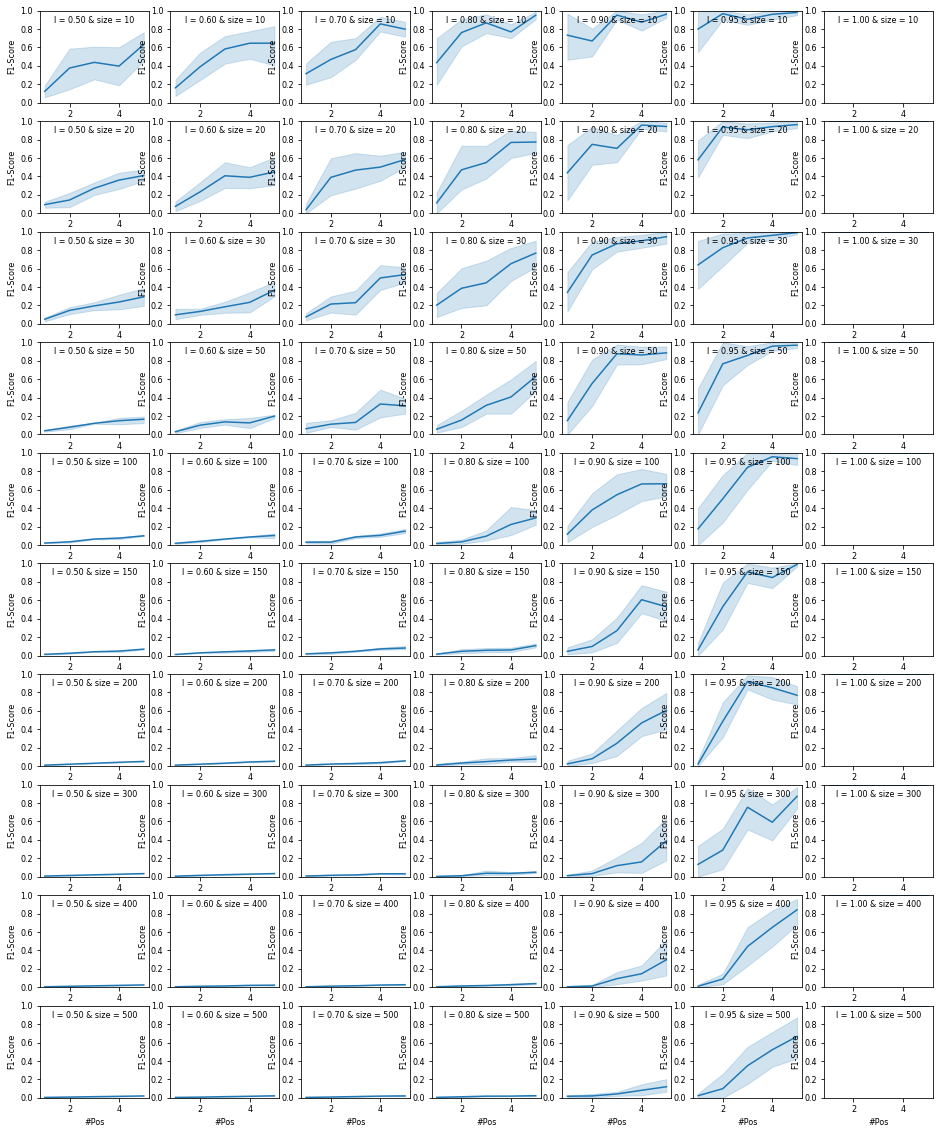

In [22]:
plt.figure(figsize=(16, 20))
i = 0
for size in ARRAY_SIZE_LIST:
    for impurity in IMPURITY_ARRAY:        
        ax = plt.subplot(10, 7, i + 1)   
        results = performance_df[(performance_df['DATA_SIZE'] == size) & (performance_df['impurity'] == float(impurity))]
        sns.lineplot(
        data=results, 
            x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95
        )
        
        ax.text(.5,.87, "l = "+impurity+f" & size = {size:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("#Pos")
        plt.ylabel("F1-Score")
        plt.ylim(0, 1)
        i += 1   


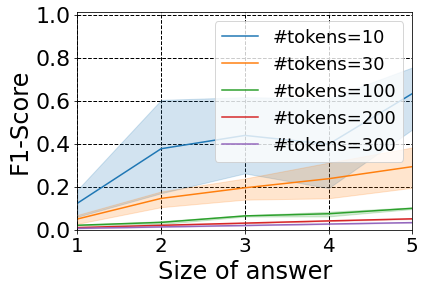

In [12]:

results = performance_df[(performance_df['impurity'] == 0.5) & (performance_df['DATA_SIZE'] == 10)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=10"
)

results = performance_df[(performance_df['impurity'] == 0.5) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=30"
)

results = performance_df[(performance_df['impurity'] == 0.5) & (performance_df['DATA_SIZE'] == 100)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=100"
)

results = performance_df[(performance_df['impurity'] == 0.5) & (performance_df['DATA_SIZE'] == 200)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=200"
)

results = performance_df[(performance_df['impurity'] == 0.5) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=300"
)



#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Size of answer")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(1, 5)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([1,2,3,4,5])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_p_l0.5.pdf', bbox_inches = 'tight')
plt.show()
        
        

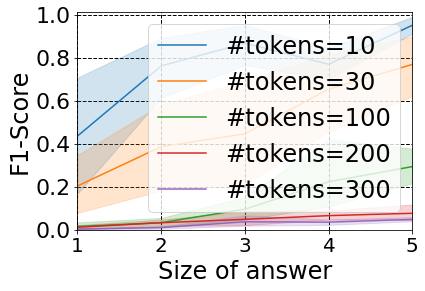

In [13]:

results = performance_df[(performance_df['impurity'] == 0.8) & (performance_df['DATA_SIZE'] == 10)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=10"
)

results = performance_df[(performance_df['impurity'] == 0.8) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=30"
)

results = performance_df[(performance_df['impurity'] == 0.8) & (performance_df['DATA_SIZE'] == 100)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=100"
)

results = performance_df[(performance_df['impurity'] == 0.8) & (performance_df['DATA_SIZE'] == 200)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=200"
)

results = performance_df[(performance_df['impurity'] == 0.8) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="pos", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="#tokens=300"
)



#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Size of answer")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(1, 5)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([1,2,3,4,5])

params = {'legend.fontsize': 20,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_p_l0.8.pdf', bbox_inches = 'tight')
plt.show()
        
        

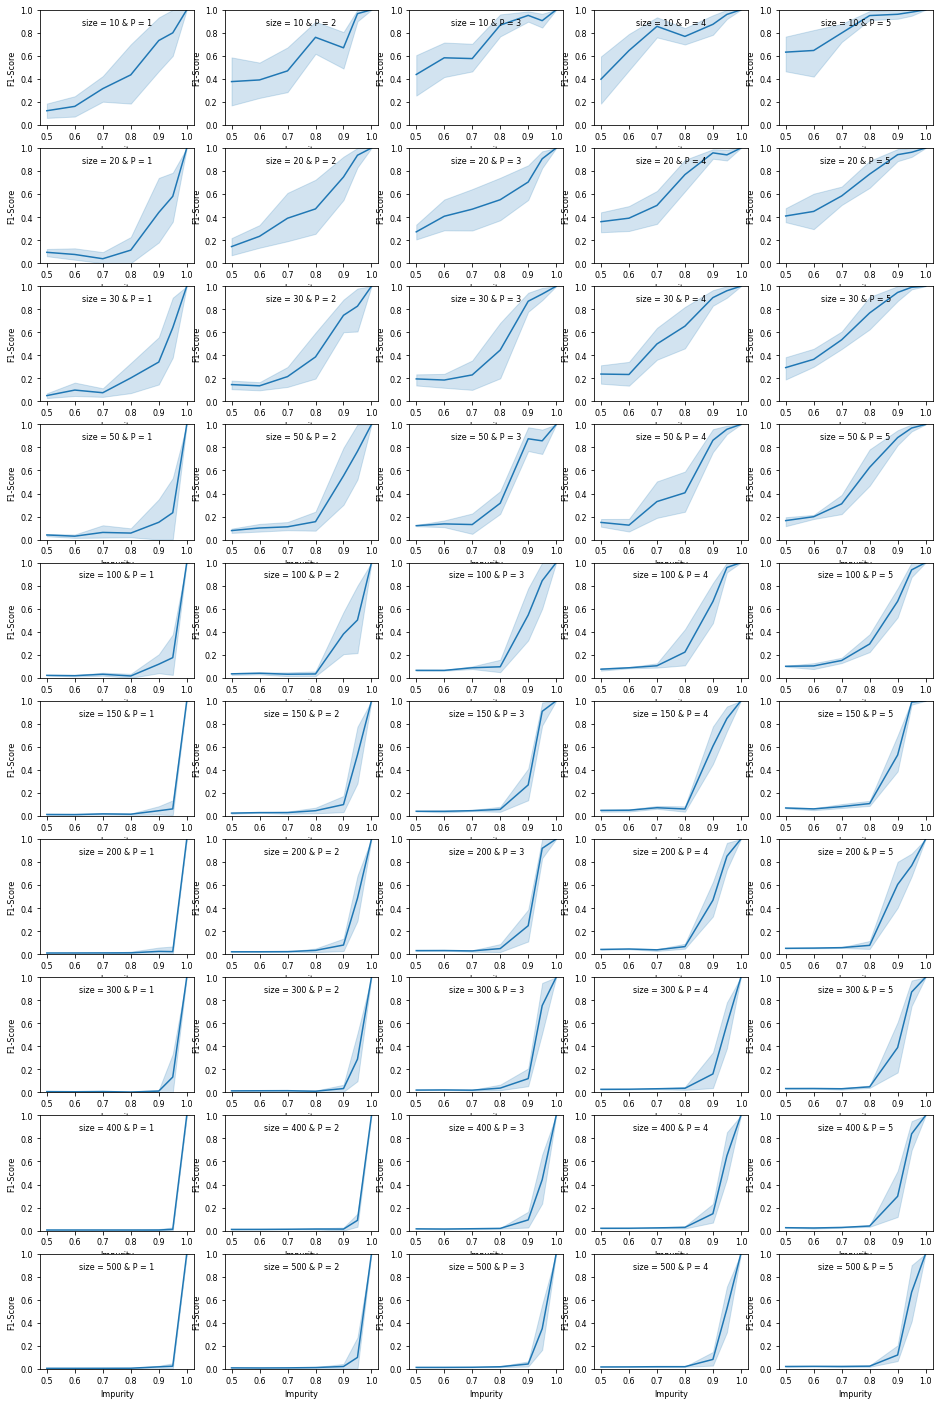

In [23]:
plt.figure(figsize=(16, 25))
i = 0
for size in ARRAY_SIZE_LIST:
    for p in P_LIST:
        ax = plt.subplot(10, 5, i + 1)   
        results = performance_df[(performance_df['pos'] == p) & (performance_df['DATA_SIZE'] == float(size))]
        sns.lineplot(
        data=results, 
            x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95
        )
        
        ax.text(.5,.87, "size = "+str(size)+f" & P = {p:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("Impurity")
        plt.ylabel("F1-Score")
        plt.ylim(0, 1)
        i += 1   


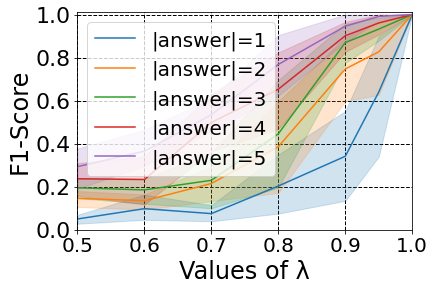

In [14]:

results = performance_df[(performance_df['pos'] == 1) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=1"
)

results = performance_df[(performance_df['pos'] == 2) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=2"
)

results = performance_df[(performance_df['pos'] == 3) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=3"
)

results = performance_df[(performance_df['pos'] == 4) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=4"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['DATA_SIZE'] == 30)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=5"
)


#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Values of λ")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(0.5, 1)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])

params = {'legend.fontsize': 20,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_lambda_data30.pdf', bbox_inches = 'tight')
plt.show()
        
        

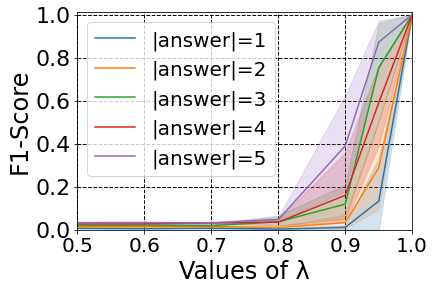

In [15]:

results = performance_df[(performance_df['pos'] == 1) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=1"
)

results = performance_df[(performance_df['pos'] == 2) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=2"
)

results = performance_df[(performance_df['pos'] == 3) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=3"
)

results = performance_df[(performance_df['pos'] == 4) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=4"
)

results = performance_df[(performance_df['pos'] == 5) & (performance_df['DATA_SIZE'] == 300)]
ax = sns.lineplot(
    data=results, 
    x="impurity", y="MILP_F1_SCORE", markers=True, dashes=True, ci=95,label="|answer|=5"
)


#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Values of λ")
plt.ylabel("F1-Score")
plt.ylim(0, 1.01)
plt.xlim(0.5, 1)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])

params = {'legend.fontsize': 20,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/F1-Score_vs_lambda_data300.pdf', bbox_inches = 'tight')
plt.show()
        
        

# Time

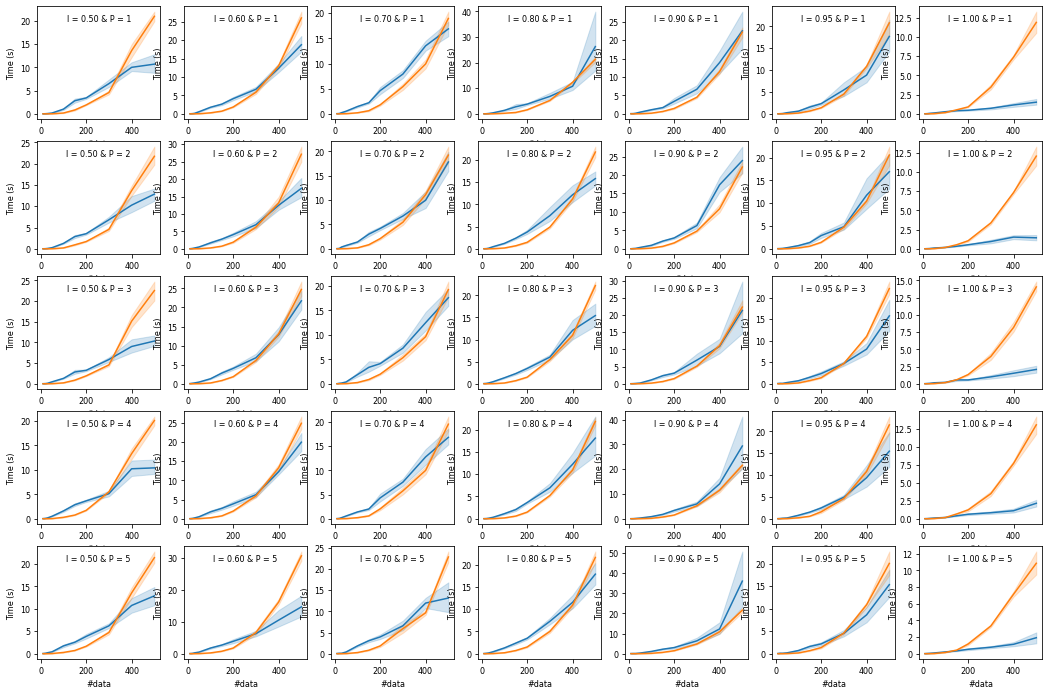

In [24]:
plt.figure(figsize=(18, 12))
i = 0
for p in P_LIST:
    for impurity in IMPURITY_ARRAY:        
        ax = plt.subplot(5, 7, i + 1)   
        results = time_df[(time_df['pos'] == p) & (time_df['impurity'] == float(impurity))]
        sns.lineplot(data=results, 
            x="DATA_SIZE", y="TIME_MILP", markers=True, dashes=True, ci=95
        )
        
        sns.lineplot(data=results, 
            x="DATA_SIZE", y="TIME_BF", markers=True, dashes=False, ci=95
        )
        
        ax.text(.5,.87, "l = "+impurity+f" & P = {p:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("#data")
        plt.ylabel("Time (s)")
#         plt.ylim(0, 1)
        i += 1   


In [ ]:
results = time_df[(time_df['pos'] == 5) & (time_df['impurity'] == 1)]
sns.lineplot(data=results, 
    x="DATA_SIZE", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

ax = sns.lineplot(data=results, 
    x="DATA_SIZE", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("#tokens")
plt.ylabel("Time (seconds)")
plt.ylim(0, 10)
plt.xlim(0, 500)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,2,4,6,8,10])
ax.set_xticks([0,100,200,300,400,500])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_data_p5_impurity1.pdf', bbox_inches = 'tight')
plt.show()
        
        
        

In [ ]:
results = time_df[(time_df['pos'] == 5) & (time_df['impurity'] == 0.5)]
sns.lineplot(data=results, 
    x="DATA_SIZE", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

ax = sns.lineplot(data=results, 
    x="DATA_SIZE", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("#tokens")
plt.ylabel("Time (seconds)")
plt.ylim(0, 25)
plt.xlim(0, 500)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,5,10,15,20,25])
ax.set_xticks([0,100,200,300,400,500])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_data_p5_impurity0.5.pdf', bbox_inches = 'tight')
plt.show()
        
        
        

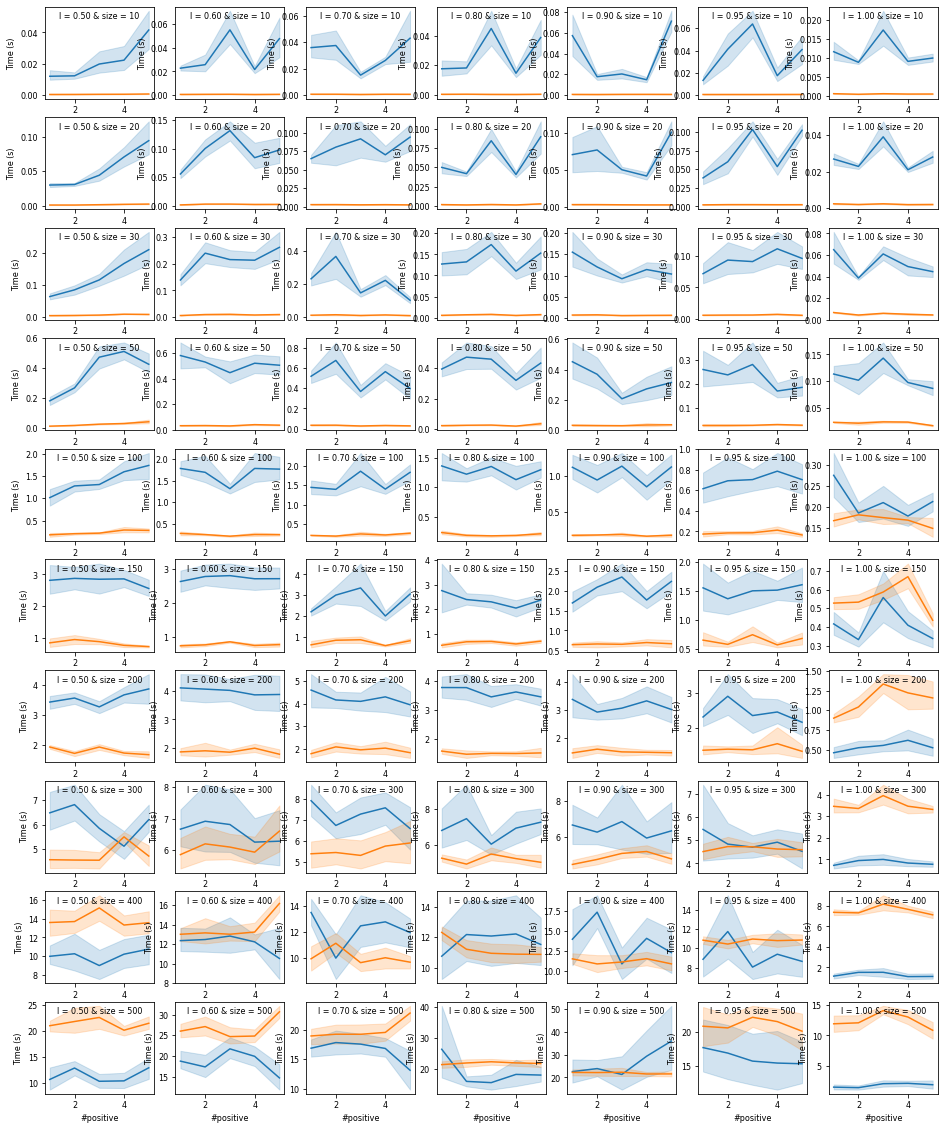

In [25]:
plt.figure(figsize=(16, 20))
i = 0
for size in ARRAY_SIZE_LIST:
    for impurity in IMPURITY_ARRAY:         
        ax = plt.subplot(10, 7, i + 1)  
        results = time_df[(time_df['DATA_SIZE'] == size) & (time_df['impurity'] == float(impurity))]
        sns.lineplot(data=results, 
            x="pos", y="TIME_MILP", markers=True, dashes=True, ci=95
        )
        
        sns.lineplot(data=results, 
            x="pos", y="TIME_BF", markers=True, dashes=False, ci=95
        )
        
        ax.text(.5,.87, "l = "+impurity+f" & size = {size:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("#positive")
        plt.ylabel("Time (s)")
#         plt.ylim(0, 1)
        i += 1   


In [ ]:
results = time_df[(time_df['DATA_SIZE'] == 10) & (time_df['impurity'] == 0.9)]
ax = sns.lineplot(data=results, 
    x="pos", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

sns.lineplot(data=results, 
    x="pos", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Size of answer")
plt.ylabel("Time (seconds)")
# plt.ylim(top=0.30)
plt.xlim(1, 5)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
# ax.set_yticks([0.1,0.2,0.3])
ax.set_xticks([1,2,3,4,5])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_p_l0.9_Data10.pdf', bbox_inches = 'tight')
plt.show()
        

In [ ]:
results = time_df[(time_df['DATA_SIZE'] == 400) & (time_df['impurity'] == 0.9)]
ax = sns.lineplot(data=results, 
    x="pos", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

sns.lineplot(data=results, 
    x="pos", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Size of answer")
plt.ylabel("Time (seconds)")
# plt.ylim(0, 10)
plt.xlim(1, 5)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,2,4,6,8,10,12])
ax.set_xticks([1,2,3,4,5])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_p_l0.9_Data400.pdf', bbox_inches = 'tight')
plt.show()
        

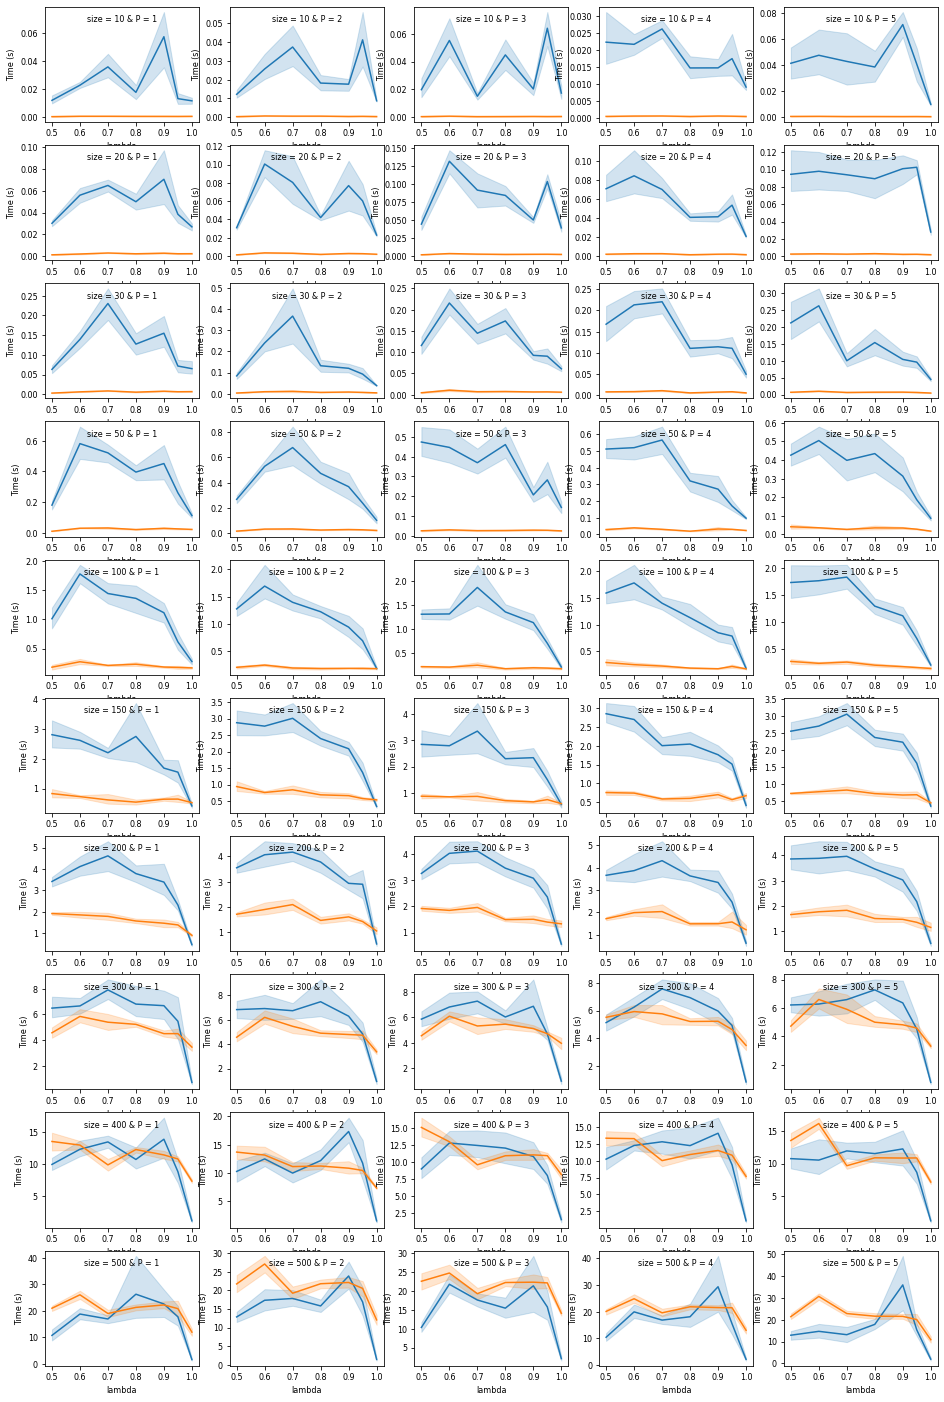

In [26]:
plt.figure(figsize=(16, 25))
i = 0
for size in ARRAY_SIZE_LIST:
    for p in P_LIST:
        ax = plt.subplot(10, 5, i + 1)  
        results = time_df[(time_df['pos'] == p) & (time_df['DATA_SIZE'] == float(size))]
        sns.lineplot(data=results, 
            x="impurity", y="TIME_MILP", markers=True, dashes=True, ci=95
        )
        
        sns.lineplot(data=results, 
            x="impurity", y="TIME_BF", markers=True, dashes=False, ci=95
        )
        
        ax.text(.5,.87, "size = "+str(size)+f" & P = {p:.0f}",
                horizontalalignment='center',
                transform=ax.transAxes)
#         ax.grid(color='black', linestyle='--', linewidth=1)
        ax.set_axisbelow(True)
        plt.xlabel("lambda")
        plt.ylabel("Time (s)")
#         plt.ylim(0, 1)
        i += 1   


In [ ]:
results = time_df[(time_df['pos'] == 2) & (time_df['DATA_SIZE'] == 500)]
ax = sns.lineplot(data=results, 
    x="impurity", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

sns.lineplot(data=results, 
    x="impurity", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Values of λ")
plt.ylabel("Time (seconds)")
plt.ylim(0, 30)
plt.xlim(0.5, 1)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,5,10,15,20,25,30])
ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_lambda_data500_p2.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
results = time_df[(time_df['pos'] == 5) & (time_df['DATA_SIZE'] == 200)]
ax = sns.lineplot(data=results, 
    x="impurity", y="TIME_MILP", markers=True, dashes=True, ci=95,label="MILP"
)

sns.lineplot(data=results, 
    x="impurity", y="TIME_BF", markers=True, dashes=False, ci=95,label="Brute Force"
)

#         ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
plt.xlabel("Values of λ")
plt.ylabel("Time (seconds)")
plt.ylim(0, 6)
plt.xlim(0.5, 1)
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_xticks([0.5,0.6,0.7,0.8,0.9,1.0])

params = {'legend.fontsize': 24,
          'axes.labelsize': 24,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 22,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.savefig('plots/Time_vs_lambda_data200_p5.pdf', bbox_inches = 'tight')
plt.show()